To simulate pulses, we need:
- the events that generate them
- the detector
- the simulation settings

In [1]:
# PET (position-energy-time) information of the simulated energy depositions
pet_filename = "data/dual-invcoax-th228-geant4_small.csv"
# detector
det_metadata = "data/public_ivc.json"
# simulation settings
sim_config_name = "configs/SSD_NoiseSim.json";

In [2]:
using LegendGeSim

In [9]:
pss_table, pss_truth = LegendGeSim.pet_to_pss(pet_filename, det_metadata, sim_config_name)

┌ Info: (Future) cached basename: public_ivc_vacuum_90K_4000V
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/sim_config.jl:33
┌ Info: Your final simulation configuration
│   sim_total = {"detector_metadata":"data/public_ivc.json","setup":{"daq":{"nsamples":3750,"type":"generic","baseline_length":1875},"preamp":{"offset":2000,"t_decay":50,"t_rise":15,"noise_sigma":3,"max_e":10000},"fadc":{"sampling_interval":16,"type":"generic"},"trigger":{"threshold":9,"type":"trapezoidal","window_lengths":[250,250,250]}},"input_file":"data/dual-invcoax-th228-geant4_small.csv","pss":{"method":"SSD","cached_name":"public_ivc_vacuum_90K_4000V"},"environment":{"crystal_t":90.0,"medium":"vacuum","op_voltage":4000}}
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/sim_config.jl:50
┌ Info: ---------------------- pet -> stp (stepping info)
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/pet_to_stp.jl:86
┌ Info: ...clustering
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/p

Processing file: data/dual-invcoax-th228-geant4_small.csv
962 hits before clustering
  0.001653 seconds (11.86 k allocations: 1.234 MiB)
137 hits after clustering
Adding fano noise


┌ Info: Waveform simulation method: SSD
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/pss.jl:70
┌ Info: //\//\// Noise simulated from scratch (fano, preamp noise)
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/noise.jl:33
┌ Info: //\//\//\ Fano noise
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/stp_to_pss.jl:18
┌ Info: _||_||_||_ Simulate detector
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/stp_to_pss.jl:21
┌ Info: Reading SSD simulation from cached file cache/public_ivc_vacuum_90K_4000V_ssd.h5f
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/detector.jl:42
┌ Info: I/O of charge drift model not yet supported. Loading default: ADLChargeDriftModel
└ @ SolidStateDetectors /home/sagitta/.julia/packages/SolidStateDetectors/LDHgv/src/Simulation/Simulation.jl:92
┌ Info: ~.~.~.~.~ Simulate charge pulses
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/stp_to_pss.jl:24
┌ Info: ~.~.~ SolidStateDetectors
└ @ LegendGeSim /home/sagitta/

(Table with 3 columns and 90 rows:
      channel  ievt  waveform
    ┌───────────────────────────────────────────────────────────────────────────
 1  │ 1        2     RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 2  │ 1        7     RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 3  │ 1        12    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 4  │ 1        13    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 5  │ 1        17    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 6  │ 1        40    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 7  │ 1        44    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 8  │ 1        55    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 9  │ 1        62    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 10 │ 1        64    RDWaveform{Quantity{Int64, 𝐓, FreeUnits{(ns,), 𝐓, nothing}…
 11 │ 1        95    RDWaveform{Quantity{Int

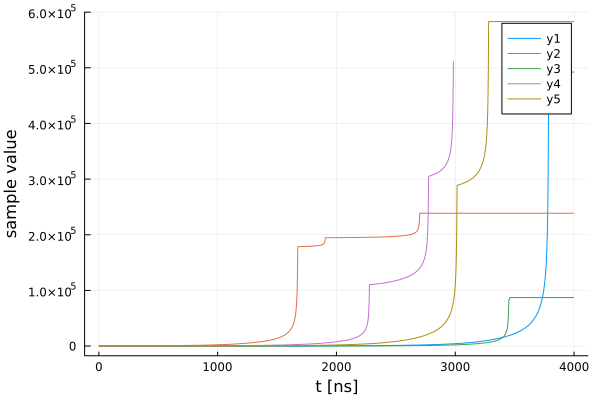

In [14]:
using Plots
plot(pss_table.waveform[1:5])

In [11]:
raw_table = LegendGeSim.pss_to_raw(pss_table, pss_truth, det_metadata, sim_config_name)

┌ Info: (Future) cached basename: public_ivc_vacuum_90K_4000V
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/sim_config.jl:33
┌ Info: ---------------------- pss -> raw (DAQ simulation)
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/pss_to_raw.jl:68
┌ Info: //\//\// Noise simulated from scratch (fano, preamp noise)
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/noise.jl:33
┌ Info: Processing waveforms...
└ @ LegendGeSim /home/sagitta/.julia/dev/LegendGeSim/src/pss_to_raw.jl:118


Table with 11 columns and 90 rows:
      baseline  channel  energy       ievt  numtraces  packet_id  ⋯
    ┌──────────────────────────────────────────────────────────────
 1  │ 10922.7   1        472.028 keV  2     1.0        0.0        ⋯
 2  │ 10921.9   1        225.304 keV  7     1.0        0.0        ⋯
 3  │ 10922.3   1        83.8782 keV  12    1.0        0.0        ⋯
 4  │ 10922.8   1        488.154 keV  13    1.0        0.0        ⋯
 5  │ 10922.1   1        558.35 keV   17    1.0        0.0        ⋯
 6  │ 10922.4   1        228.653 keV  40    1.0        0.0        ⋯
 7  │ 10922.1   1        2494.3 keV   44    1.0        0.0        ⋯
 8  │ 10922.4   1        342.271 keV  55    1.0        0.0        ⋯
 9  │ 10922.9   1        91.3353 keV  62    1.0        0.0        ⋯
 10 │ 10922.6   1        228.424 keV  64    1.0        0.0        ⋯
 11 │ 10922.6   1        2502.52 keV  95    1.0        0.0        ⋯
 12 │ 10921.5   1        74.6965 keV  102   1.0        0.0        ⋯
 13 │ 10922.3

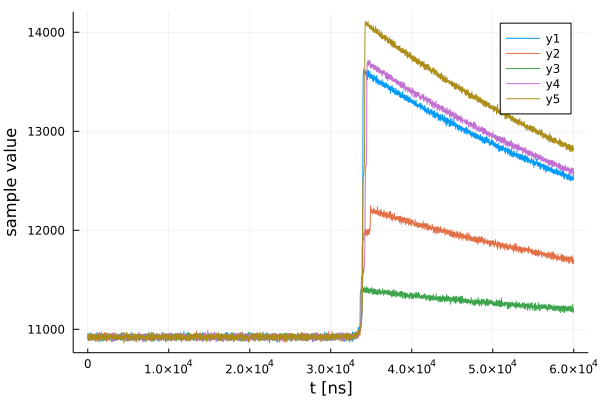

In [13]:
plot(raw_table.waveform[1:5])